# KNN Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv('xdata.csv')
dfy=pd.read_csv('ydata.csv')


In [3]:
x=dfx.values
y=dfy.values

In [4]:
x=x[:,1:]
y=y[:,1:].reshape((-1,))

In [5]:
print(x.shape)
print(y.shape)

(399, 2)
(399,)


In [10]:
plt.style.use('seaborn')


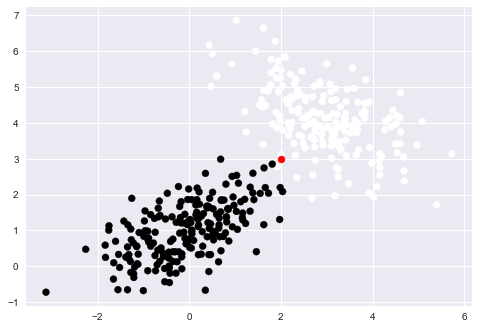

In [19]:


plt.scatter(x[:,0],x[:,1],c=y)
query_x=np.array([2,3])
plt.scatter(query_x[0],query_x[1],c='red')
plt.show()

In [50]:
#euclidian distance
def dist(x1,y1):
    return (np.sqrt((sum(x1-y1)**2)))

def knn(x,y,query_point,k=5):
    vals=[]
    m=x.shape[0]
    
    for i in range(m):
        d=dist(query_point,x[i])
        vals.append((d,y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred
    #print(vals)

In [36]:
#pred=knn(x,y,[2,2.8])
#print(pred)

0.0


## Recognizing MNIST handwritten digits using KNN

In [37]:
#data preparation
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [38]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [39]:
data=df.values
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(42000, 785)


In [40]:
X=data[:,1:]
Y=data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [41]:
split=int(0.8*X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


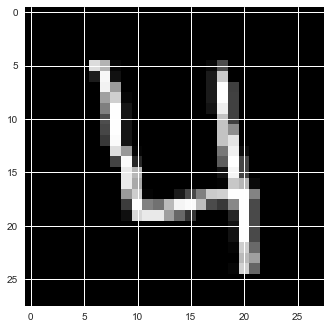

In [43]:
#visualize some samples
def imgdraw(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
imgdraw(X_train[3])

In [51]:
#make predictions
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

6


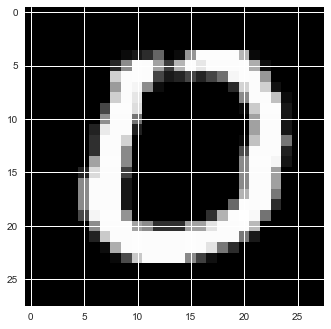

0


In [49]:
imgdraw(X_test[0])
print(Y_test[0])